In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from qiskit_metal import designs, MetalGUI

design = designs.DesignPlanar()
design.overwrite_enabled = True

In [3]:
design.chips.main.size_x = '12mm'
design.chips.main.size_y = '10mm'

In [4]:
gui = MetalGUI(design)

In [5]:
from qiskit_metal.qlibrary.qubits.transmon_pocket_cl import TransmonPocketCL

design.delete_all_components()

design_span_x = 5
design_span_y = 3

half_chip_width = design_span_x / 2
half_chip_height = design_span_y / 2

connection_pads_options = dict(
    a = dict(loc_W=1, loc_H=-1),
    b = dict(loc_W=1, loc_H=1),
    c = dict(loc_W=-1, loc_H=-1)
)

transmons = []

transmons.append(TransmonPocketCL(design, 'Q1',
                      options=dict(pos_x=f'-{half_chip_width}mm',
                                   pos_y=f'{-half_chip_height}mm',
                                   connection_pads=dict(**connection_pads_options))))

transmons.append(TransmonPocketCL(design, 'Q2',
                      options=dict(pos_x=f'0mm',
                                   pos_y=f'{half_chip_height}mm',
                                   orientation=-90,
                                   connection_pads=dict(d=dict(loc_W=-1, loc_H=1), **connection_pads_options))))

transmons.append(TransmonPocketCL(design, 'Q3',
                      options=dict(pos_x=f'0mm',
                                   pos_y=f'{-half_chip_height}mm',
                                   orientation=90,
                                   connection_pads=dict(d=dict(loc_W=-1, loc_H=1), **connection_pads_options))))

transmons.append(TransmonPocketCL(design, 'Q4',
                      options=dict(pos_x=f'{half_chip_width}mm',
                                   pos_y=f'{half_chip_height}mm',
                                   orientation=180,
                                   connection_pads=dict(**connection_pads_options))))

gui.rebuild()
gui.autoscale()

In [6]:
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal import Dict

fillet='99.99um'
options = Dict(
    meander=Dict(
        lead_start='0.1mm',
        lead_end='0.1mm',
        asymmetry='0 um')
)

def connect(component_name: str, component1: str, pin1: str, component2: str, pin2: str,
            length: str,
            asymmetry='0 um', start_strght='0 um', end_strght='0 um', flip=False):
    """Connect two pins with a CPW."""
    myoptions = Dict(
        pin_inputs=Dict(
            start_pin=Dict(
                component=component1,
                pin=pin1),
            end_pin=Dict(
                component=component2,
                pin=pin2)),
        lead=Dict(
            start_straight=start_strght,
            end_straight=end_strght
        ),
        total_length=length,
    fillet = '99.9um')
    myoptions.update(options)
    myoptions.meander.asymmetry = asymmetry
    myoptions.meander.lead_direction_inverted = 'true' if flip else 'false'
    return RouteMeander(design, component_name, myoptions)

asym_h = 100
asym_v = 100
cpw = []

cpw.append(connect('cpw1', 'Q1', 'b', 'Q2', 'a', '8 mm', f'+{asym_h}um', '0.1mm', '0.1mm'))
cpw.append(connect('cpw2', 'Q3', 'b', 'Q2', 'b', '8 mm', f'-{asym_v}um', '0.6mm', '0.4mm'))
cpw.append(connect('cpw3', 'Q4', 'b', 'Q3', 'a', '8 mm', f'+{asym_h}um', '0.1mm', '0.1mm'))
cpw.append(connect('cpw4', 'Q3', 'd', 'Q1', 'a', '8 mm', f'-{asym_h}um', '0.1mm', '0.1mm'))
cpw.append(connect('cpw5', 'Q2', 'd', 'Q4', 'a', '8 mm', f'-{asym_h}um', '0.1mm', '0.1mm'))


gui.rebuild()
gui.autoscale()

In [7]:
from qiskit_metal.qlibrary.terminations.launchpad_wb_coupled import LaunchpadWirebondCoupled

readouts_lwc = []
control_lwc = []

offset_x = 0
offset_y = 1


#Readouts
readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R1',
                                         options = dict(
                                         pos_x = '-5mm',
                                         pos_y = f'-{half_chip_height+offset_y}mm',
                                         lead_length = '30um')))

readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R2',
                                         options = dict(
                                         pos_x = '-1mm',
                                         pos_y = '4mm',
                                         orientation = -90,
                                         lead_length = '30um')))

readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R3',
                                         options = dict(
                                         pos_x = '1mm',
                                         pos_y = '-4mm',
                                         orientation = 90,
                                         lead_length = '30um')))

readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R4',
                                         options = dict(
                                         pos_x = '5mm',
                                         pos_y = f'{half_chip_height+offset_y}mm',
                                         orientation = 180,
                                         lead_length = '30um')))

#Controls
control_lwc.append(LaunchpadWirebondCoupled(design, 'CL1',
                                         options = dict(
                                         pos_x = '-5mm',
                                         pos_y = '2mm',
                                         lead_length = '30um')))

control_lwc.append(LaunchpadWirebondCoupled(design, 'CL2',
                                         options = dict(
                                         pos_x = '4mm',
                                         pos_y = '4mm',
                                         orientation = -90,
                                         lead_length = '30um')))

control_lwc.append(LaunchpadWirebondCoupled(design, 'CL3',
                                         options = dict(
                                         pos_x = '-4mm',
                                         pos_y = '-4mm',
                                         orientation = 90,
                                         lead_length = '30um')))

control_lwc.append(LaunchpadWirebondCoupled(design, 'CL4',
                                         options = dict(
                                         pos_x = '5mm',
                                         pos_y = '-2mm',
                                         orientation = 180,
                                         lead_length = '30um')))

gui.rebuild()
gui.autoscale()

In [8]:
readout_lines = []

asym_14 = 700
asym_23 = 700
options = Dict(
    lead=Dict(
        start_straight='430um',
        end_straight='0um'),
    fillet='99.99um')

readout_lines.append(connect('ol1', 'Q1', 'c', 'R1', 'tie', '8 mm', f'{asym_14}um'))
readout_lines.append(connect('ol2', 'Q2', 'c', 'R2', 'tie', '8 mm', f'{asym_23}um'))
readout_lines.append(connect('ol3', 'Q3', 'c', 'R3', 'tie', '8 mm', f'{asym_23}um'))
readout_lines.append(connect('ol4', 'Q4', 'c', 'R4', 'tie', '8 mm', f'{asym_14}um'))

gui.rebuild()
gui.autoscale()

In [9]:
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors
from collections import OrderedDict
import numpy as np

control_lines = []

def connectRouteAnchor(name: str,
                       component1: str, pin1: str, component2: str, pin2: str,
                       anchor_points: OrderedDict) -> RouteAnchors:

    options_line_cl = dict(
        pin_inputs = dict(start_pin = dict(component = component1, pin = pin1),
                          end_pin = dict(component = component2, pin = pin2)),
        anchors = anchor_points,
        lead = dict(start_straight = '200um',
                    end_straight = '225um'),
        fillet = fillet
    )
    
    return RouteAnchors(design, name, options_line_cl)



anchors1c = OrderedDict()
anchors1c[0] = np.array([-4, -1.42])
anchors1c[1] = np.array([-4, 2])

control_lines.append(connectRouteAnchor('line_cl1', 'Q1', 'Charge_Line', 'CL1', 'tie', anchors1c))


anchors2c = OrderedDict()
anchors2c[0] = np.array([0.08, 3.25])
anchors2c[1] = np.array([4, 3.25])

control_lines.append(connectRouteAnchor('line_cl2', 'Q2', 'Charge_Line', 'CL2', 'tie', anchors2c))

anchors3c = OrderedDict()
anchors3c[0] = np.array([-0.08, -3.25])
anchors3c[1] = np.array([-4, -3.25])

control_lines.append(connectRouteAnchor('line_cl3', 'Q3', 'Charge_Line', 'CL3', 'tie', anchors3c))

anchors4c = OrderedDict()
anchors4c[0] = np.array([4, 1.42])
anchors4c[1] = np.array([4, -2])

control_lines.append(connectRouteAnchor('line_cl4', 'Q4', 'Charge_Line', 'CL4', 'tie', anchors4c))

gui.rebuild()
gui.autoscale()

In [10]:
# Qubit Frequencies
# Q1 : 5
# Q2 : 5.1
# Q3 : 5.2
# Q4 : 5.3

# Readout Frequencies
# R1 : 7
# R2 : 7.1
# R3 : 7.2
# R4 : 7.3

# CPW Frequencies
# cpw1 : 7.5
# cpw2 : 7.6
# cpw3 : 7.7
# cpw4 : 7.8
# cpw5 : 7.9

In [11]:
# CPW rough length calculator
freq_new = 7.3
freq = (freq_new + 1.80) * (10**9)
c = 3 * (10**8)
lamb = c / freq * (10**6)
lamb/4

8241.758241758242

In [12]:
# To set the global variable for CPW width
design.variables['cpw_width'] = '20um'

gui.rebuild()

In [13]:
readout_lines[0].options.total_length = '8522.72 um'
readout_lines[1].options.total_length = '8426.96 um'
readout_lines[2].options.total_length = '8333.33 um'
readout_lines[3].options.total_length = '8241.75 um'

cpw[0].options.total_length = '8064.51 um'
cpw[1].options.total_length = '7978.72 um'
cpw[2].options.total_length = '7894.73 um'
cpw[3].options.total_length = '7812.50 um'
cpw[4].options.total_length = '7731.96 um'

gui.rebuild()

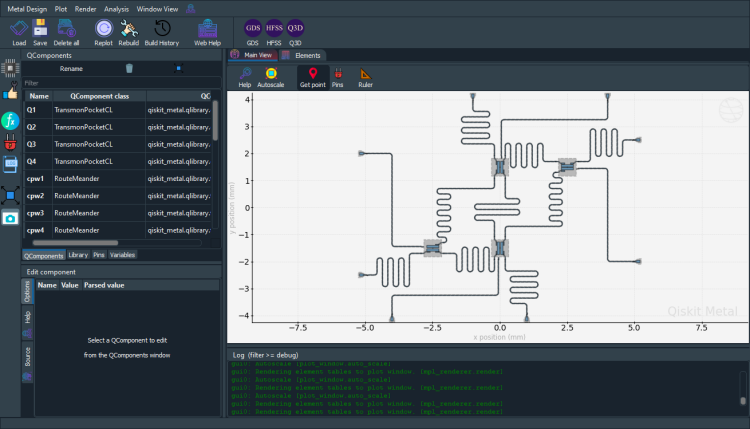

In [14]:
gui.screenshot()

### EPR Analyses

#### Coupler (cpw1)

In [15]:
from qiskit_metal.analyses.quantization import EPRanalysis
eig_res1 = EPRanalysis(design, "hfss")
hfss1 = eig_res1.sim.renderer
hfss1.start()

INFO 12:30AM [connect_project]: Connecting to Ansys Desktop API...
INFO 12:30AM [load_ansys_project]: 	Opened Ansys App
INFO 12:30AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 12:30AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/Nilay/Documents/Ansoft/
	Project:   Project3
INFO 12:30AM [connect_design]: 	Opened active design
	Design:    Tune_Q4 [Solution type: Q3D]
INFO 12:30AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 12:30AM [connect]: 	Connected to project "Project3" and design "Tune_Q4" 😀 



True

In [16]:
cpw[0].options.total_length = '8064.51 um'
gui.rebuild()

hfss1.activate_ansys_design("Tune_CPW1", 'eigenmode')
hfss1.render_design(['cpw1'], [('cpw1', 'start'), ('cpw1', 'end')])

12:30AM 10s WARNING [activate_ansys_design]: The design_name=Tune_CPW1 was not in active project.  Designs in active project are: 
['Tune_Q2', 'Tune_Q3', 'Tune_Q1', 'Tune_Q4'].  A new design will be added to the project.  
INFO 12:30AM [connect_design]: 	Opened active design
	Design:    Tune_CPW1 [Solution type: Eigenmode]
WARNING 12:30AM [connect_setup]: 	No design setup detected.
WARNING 12:30AM [connect_setup]: 	Creating eigenmode default setup.
INFO 12:30AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


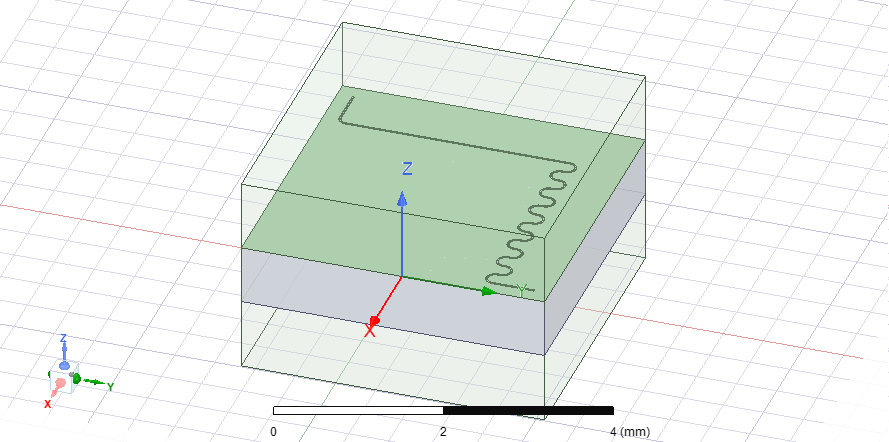

'C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/ansys_renders/cpw1.png'

In [17]:
hfss1.save_screenshot("C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/ansys_renders/cpw1.png")

In [17]:
# Analysis properties
setup1 = hfss1.pinfo.setup
setup1.passes = 10
setup1.n_modes = 1
print(f"""
Number of eigenmodes to find             = {setup1.n_modes}
Number of simulation passes              = {setup1.passes}
Convergence freq max delta percent diff  = {setup1.delta_f}
""")

# Next 2 lines are counterinuitive, since there is no junction in this resonator.
# However, these are necessary to make pyEPR work correctly. Please do note delete
hfss1.pinfo.design.set_variable('Lj', '12 nH')
hfss1.pinfo.design.set_variable('Cj', '1 fF')

setup1.analyze()

INFO 12:30AM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 10
Convergence freq max delta percent diff  = 0.1



In [18]:
eig_res1.sim.convergence_t, eig_res1.sim.convergence_f, _ = hfss1.get_convergences()
eig_res1.sim.plot_convergences()

12:33AM 15s INFO [get_f_convergence]: Saved convergences to C:\Users\Nilay\Documents\GitHub\qiskit-metal-qubit-design\hfss_eig_f_convergence.csv


In [19]:
eig_res1.sim.plot_fields("main")
hfss1.save_screenshot("C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/ansys_renders/cpw1_e-field.png")

OSError: Setup {} not found: ('Setup',)

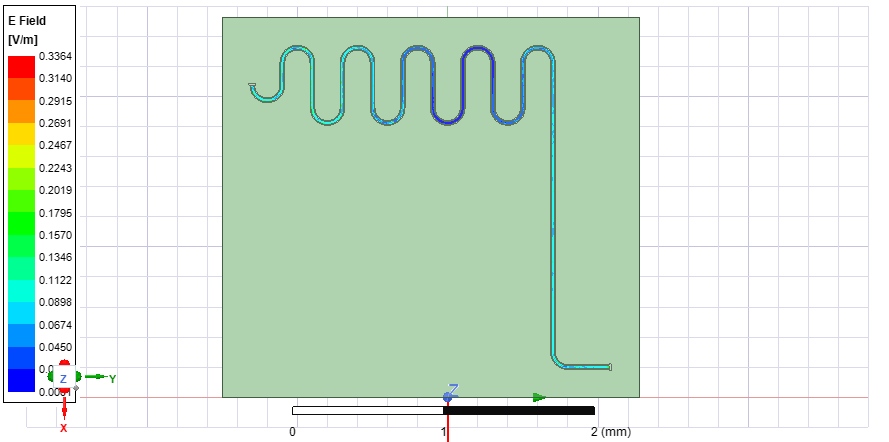

'C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/ansys_renders/cpw1_e-field.png'

In [20]:
hfss1.save_screenshot("C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/ansys_renders/cpw1_e-field.png")

In [ ]:
eig_res1.epr_start(no_junctions=True)

In [ ]:
eprd = hfss1.epr_distributed_analysis

In [ ]:
ℰ_elec = eprd.calc_energy_electric()
ℰ_elec_substrate = eprd.calc_energy_electric(None, 'main')
ℰ_mag = eprd.calc_energy_magnetic()

print(f"""
ℰ_elec_all       = {ℰ_elec}
ℰ_elec_substrate = {ℰ_elec_substrate}
EPR of substrate = {ℰ_elec_substrate / ℰ_elec * 100 :.1f}%

ℰ_mag    = {ℰ_mag}
""")

In [ ]:
eig_res1.sim.close()

#### Coupler (cpw2)

In [21]:
from qiskit_metal.analyses.quantization import EPRanalysis
eig_res2 = EPRanalysis(design, "hfss")
hfss2 = eig_res2.sim.renderer
hfss2.start()

INFO 12:36AM [connect_project]: Connecting to Ansys Desktop API...
INFO 12:36AM [load_ansys_project]: 	Opened Ansys App
INFO 12:36AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 12:36AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/Nilay/Documents/Ansoft/
	Project:   Project3
INFO 12:36AM [connect_design]: 	Opened active design
	Design:    Tune_CPW1 [Solution type: Eigenmode]
INFO 12:36AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:36AM [connect]: 	Connected to project "Project3" and design "Tune_CPW1" 😀 



True

In [22]:
cpw[1].options.total_length = '7978.72 um'
gui.rebuild()

hfss2.activate_ansys_design("Tune_CPW2", 'eigenmode')
hfss2.render_design(['cpw2'], [('cpw2', 'start'), ('cpw2', 'end')])

12:36AM 46s WARNING [activate_ansys_design]: The design_name=Tune_CPW2 was not in active project.  Designs in active project are: 
['Tune_Q2', 'Tune_Q3', 'Tune_Q1', 'Tune_CPW1', 'Tune_Q4'].  A new design will be added to the project.  
INFO 12:36AM [connect_design]: 	Opened active design
	Design:    Tune_CPW2 [Solution type: Eigenmode]
WARNING 12:36AM [connect_setup]: 	No design setup detected.
WARNING 12:36AM [connect_setup]: 	Creating eigenmode default setup.
INFO 12:36AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


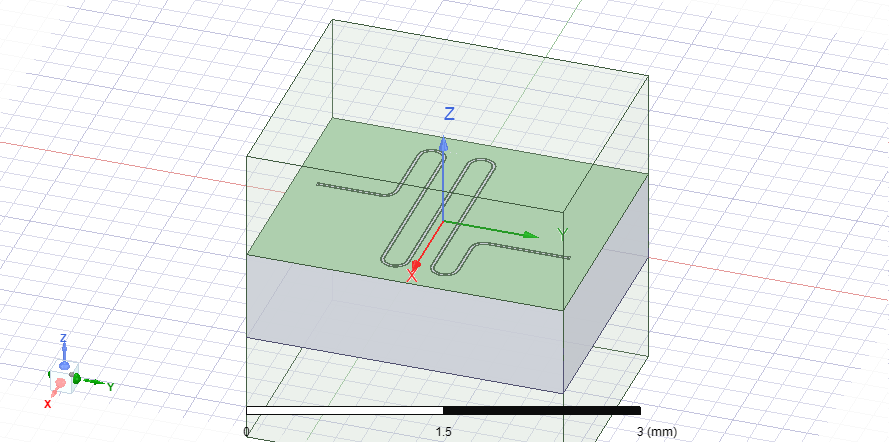

'C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/ansys_renders/cpw2.png'

In [23]:
hfss2.save_screenshot("C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/ansys_renders/cpw2.png")

In [24]:
# Analysis properties
setup2 = hfss2.pinfo.setup
setup2.passes = 10
setup2.n_modes = 1
print(f"""
Number of eigenmodes to find             = {setup2.n_modes}
Number of simulation passes              = {setup2.passes}
Convergence freq max delta percent diff  = {setup2.delta_f}
""")

# Next 2 lines are counterinuitive, since there is no junction in this resonator.
# However, these are necessary to make pyEPR work correctly. Please do note delete
hfss2.pinfo.design.set_variable('Lj', '12 nH')
hfss2.pinfo.design.set_variable('Cj', '1 fF')

setup2.analyze()


Number of eigenmodes to find             = 1
Number of simulation passes              = 10
Convergence freq max delta percent diff  = 0.1



INFO 12:37AM [analyze]: Analyzing setup Setup


In [25]:
eig_res2.sim.convergence_t, eig_res2.sim.convergence_f, _ = hfss2.get_convergences()
eig_res2.sim.plot_convergences()

12:40AM 06s INFO [get_f_convergence]: Saved convergences to C:\Users\Nilay\Documents\GitHub\qiskit-metal-qubit-design\hfss_eig_f_convergence.csv


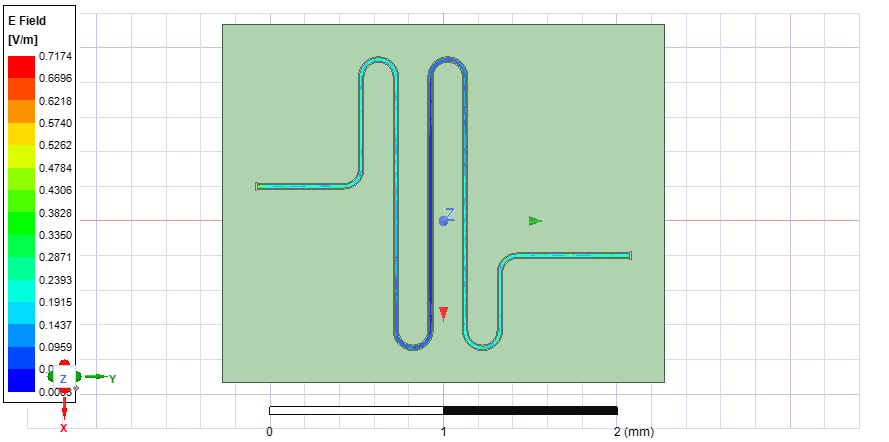

'C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/ansys_renders/cpw2_e-field.png'

In [27]:

hfss1.save_screenshot("C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/ansys_renders/cpw2_e-field.png")

#### Coupler (cpw3)

In [28]:
from qiskit_metal.analyses.quantization import EPRanalysis
eig_res3 = EPRanalysis(design, "hfss")
hfss3 = eig_res3.sim.renderer
hfss3.start()

INFO 12:45AM [connect_project]: Connecting to Ansys Desktop API...
INFO 12:45AM [load_ansys_project]: 	Opened Ansys App
INFO 12:45AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 12:45AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/Nilay/Documents/Ansoft/
	Project:   Project3
INFO 12:45AM [connect_design]: 	Opened active design
	Design:    Tune_CPW2 [Solution type: Eigenmode]
INFO 12:45AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:45AM [connect]: 	Connected to project "Project3" and design "Tune_CPW2" 😀 



True

In [29]:
cpw[2].options.total_length = '7894.73 um'
gui.rebuild()

hfss3.activate_ansys_design("Tune_CPW3", 'eigenmode')
hfss3.render_design(['cpw3'], [('cpw3', 'start'), ('cpw3', 'end')])

12:45AM 19s WARNING [activate_ansys_design]: The design_name=Tune_CPW3 was not in active project.  Designs in active project are: 
['Tune_Q2', 'Tune_Q3', 'Tune_Q1', 'Tune_CPW1', 'Tune_CPW2', 'Tune_Q4'].  A new design will be added to the project.  
INFO 12:45AM [connect_design]: 	Opened active design
	Design:    Tune_CPW3 [Solution type: Eigenmode]
WARNING 12:45AM [connect_setup]: 	No design setup detected.
WARNING 12:45AM [connect_setup]: 	Creating eigenmode default setup.
INFO 12:45AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


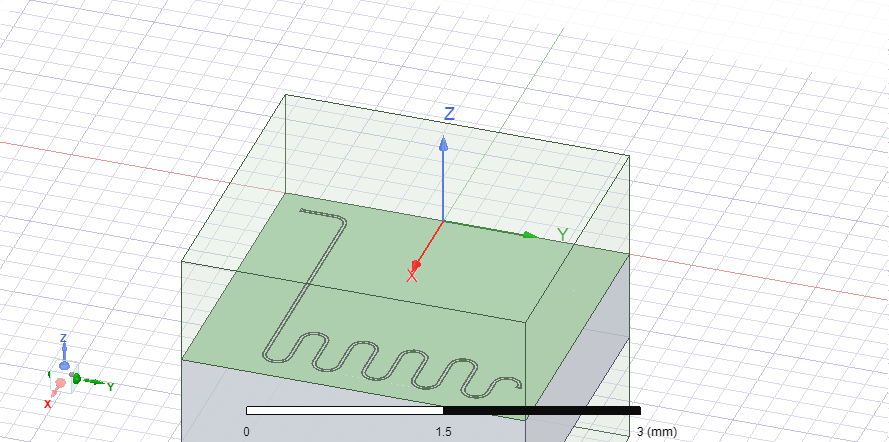

'C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/ansys_renders/cpw3.png'

In [30]:
hfss3.save_screenshot("C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/ansys_renders/cpw3.png")

In [31]:
# Analysis properties
setup3 = hfss3.pinfo.setup
setup3.passes = 10
setup3.n_modes = 1
print(f"""
Number of eigenmodes to find             = {setup3.n_modes}
Number of simulation passes              = {setup3.passes}
Convergence freq max delta percent diff  = {setup3.delta_f}
""")

# Next 2 lines are counterinuitive, since there is no junction in this resonator.
# However, these are necessary to make pyEPR work correctly. Please do note delete
hfss3.pinfo.design.set_variable('Lj', '12 nH')
hfss3.pinfo.design.set_variable('Cj', '1 fF')

setup3.analyze()


Number of eigenmodes to find             = 1
Number of simulation passes              = 10
Convergence freq max delta percent diff  = 0.1



INFO 12:45AM [analyze]: Analyzing setup Setup


In [32]:
eig_res3.sim.convergence_t, eig_res3.sim.convergence_f, _ = hfss3.get_convergences()
eig_res3.sim.plot_convergences()

12:46AM 20s INFO [get_f_convergence]: Saved convergences to C:\Users\Nilay\Documents\GitHub\qiskit-metal-qubit-design\hfss_eig_f_convergence.csv
INFO 12:46AM [__del__]: Disconnected from Ansys HFSS


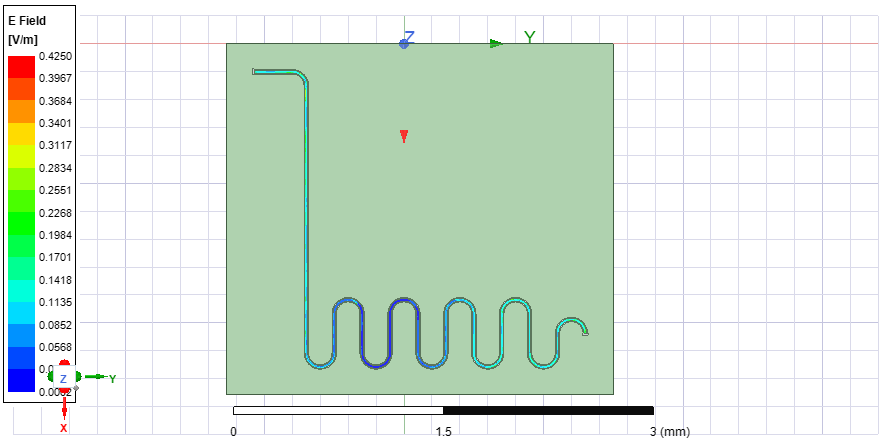

'C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/ansys_renders/cpw3_e-field.png'

In [33]:
hfss1.save_screenshot("C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/ansys_renders/cpw3_e-field.png")

#### Coupler (cpw4)

In [34]:
from qiskit_metal.analyses.quantization import EPRanalysis
eig_res4 = EPRanalysis(design, "hfss")
hfss4 = eig_res4.sim.renderer
hfss4.start()

INFO 12:48AM [connect_project]: Connecting to Ansys Desktop API...
INFO 12:48AM [load_ansys_project]: 	Opened Ansys App
INFO 12:48AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 12:48AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/Nilay/Documents/Ansoft/
	Project:   Project3
INFO 12:48AM [connect_design]: 	Opened active design
	Design:    Tune_CPW3 [Solution type: Eigenmode]
INFO 12:48AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:48AM [connect]: 	Connected to project "Project3" and design "Tune_CPW3" 😀 



True

In [35]:
cpw[3].options.total_length = '7812.50 um'
gui.rebuild()

hfss4.activate_ansys_design("Tune_CPW4", 'eigenmode')
hfss4.render_design(['cpw4'], [('cpw4', 'start'), ('cpw4', 'end')])

12:48AM 41s WARNING [activate_ansys_design]: The design_name=Tune_CPW4 was not in active project.  Designs in active project are: 
['Tune_Q2', 'Tune_Q3', 'Tune_Q1', 'Tune_CPW3', 'Tune_CPW1', 'Tune_CPW2', 'Tune_Q4'].  A new design will be added to the project.  
INFO 12:48AM [connect_design]: 	Opened active design
	Design:    Tune_CPW4 [Solution type: Eigenmode]
WARNING 12:48AM [connect_setup]: 	No design setup detected.
WARNING 12:48AM [connect_setup]: 	Creating eigenmode default setup.
INFO 12:48AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


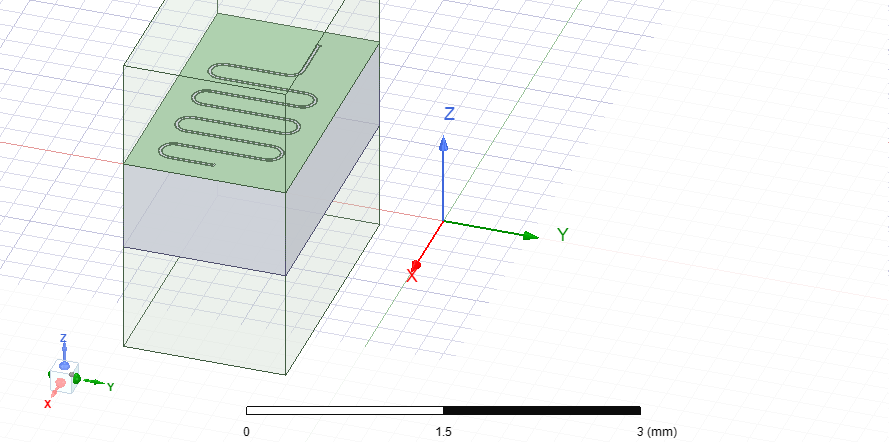

'C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/ansys_renders/cpw4.png'

In [36]:
hfss4.save_screenshot("C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/ansys_renders/cpw4.png")

In [37]:
# Analysis properties
setup4 = hfss4.pinfo.setup
setup4.passes = 10
setup4.n_modes = 1
print(f"""
Number of eigenmodes to find             = {setup4.n_modes}
Number of simulation passes              = {setup4.passes}
Convergence freq max delta percent diff  = {setup4.delta_f}
""")

# Next 2 lines are counterinuitive, since there is no junction in this resonator.
# However, these are necessary to make pyEPR work correctly. Please do note delete
hfss4.pinfo.design.set_variable('Lj', '12 nH')
hfss4.pinfo.design.set_variable('Cj', '1 fF')

setup4.analyze()

INFO 12:48AM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 10
Convergence freq max delta percent diff  = 0.1



In [38]:
eig_res4.sim.convergence_t, eig_res4.sim.convergence_f, _ = hfss4.get_convergences()
eig_res4.sim.plot_convergences()

12:49AM 14s INFO [get_f_convergence]: Saved convergences to C:\Users\Nilay\Documents\GitHub\qiskit-metal-qubit-design\hfss_eig_f_convergence.csv


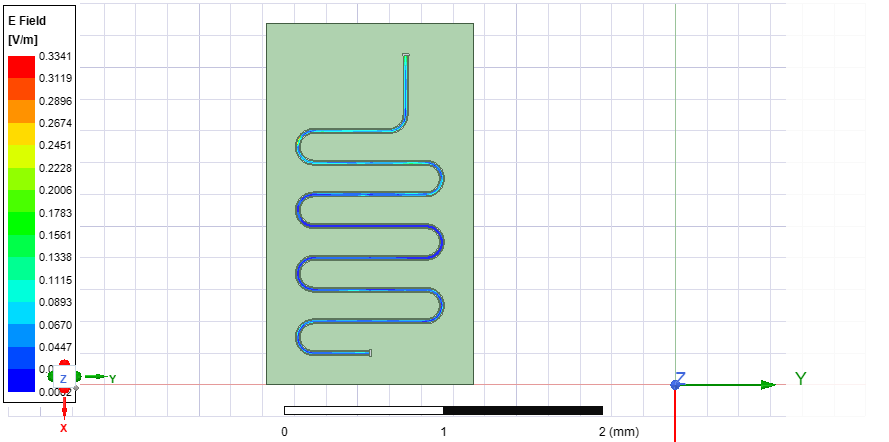

'C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/ansys_renders/cpw4_e-field.png'

In [39]:
hfss1.save_screenshot("C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/ansys_renders/cpw4_e-field.png")

#### Coupler (cpw5)

In [40]:
from qiskit_metal.analyses.quantization import EPRanalysis
eig_res5 = EPRanalysis(design, "hfss")
hfss5 = eig_res5.sim.renderer
hfss5.start()

INFO 12:51AM [connect_project]: Connecting to Ansys Desktop API...
INFO 12:51AM [load_ansys_project]: 	Opened Ansys App
INFO 12:51AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 12:51AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/Nilay/Documents/Ansoft/
	Project:   Project3
INFO 12:51AM [connect_design]: 	Opened active design
	Design:    Tune_CPW4 [Solution type: Eigenmode]
INFO 12:51AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:51AM [connect]: 	Connected to project "Project3" and design "Tune_CPW4" 😀 



True

In [41]:
cpw[4].options.total_length = '7731.96 um'
gui.rebuild()

hfss5.activate_ansys_design("Tune_CPW5", 'eigenmode')
hfss5.render_design(['cpw5'], [('cpw5', 'start'), ('cpw5', 'end')])

12:51AM 20s WARNING [activate_ansys_design]: The design_name=Tune_CPW5 was not in active project.  Designs in active project are: 
['Tune_Q2', 'Tune_Q3', 'Tune_Q1', 'Tune_CPW4', 'Tune_CPW3', 'Tune_CPW1', 'Tune_CPW2', 'Tune_Q4'].  A new design will be added to the project.  
INFO 12:51AM [connect_design]: 	Opened active design
	Design:    Tune_CPW5 [Solution type: Eigenmode]
WARNING 12:51AM [connect_setup]: 	No design setup detected.
WARNING 12:51AM [connect_setup]: 	Creating eigenmode default setup.
INFO 12:51AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


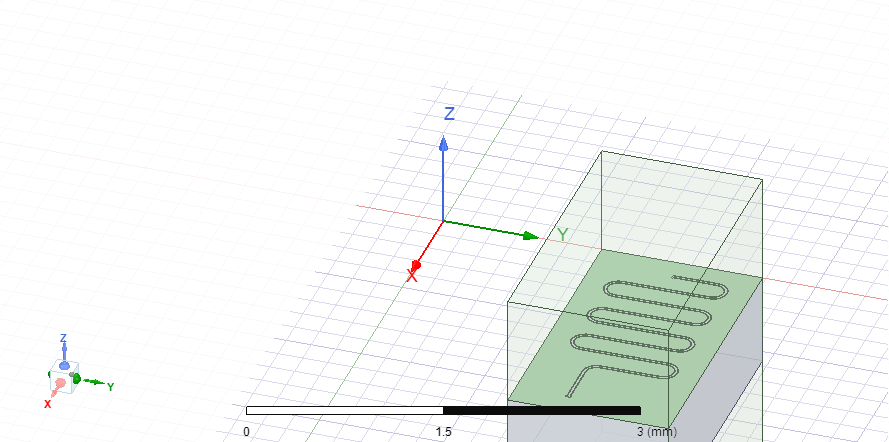

'C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/ansys_renders/cpw5.png'

In [42]:
hfss5.save_screenshot("C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/ansys_renders/cpw5.png")

In [43]:
# Analysis properties
setup5 = hfss5.pinfo.setup
setup5.passes = 10
setup5.n_modes = 1
print(f"""
Number of eigenmodes to find             = {setup5.n_modes}
Number of simulation passes              = {setup5.passes}
Convergence freq max delta percent diff  = {setup5.delta_f}
""")

# Next 2 lines are counterinuitive, since there is no junction in this resonator.
# However, these are necessary to make pyEPR work correctly. Please do note delete
hfss5.pinfo.design.set_variable('Lj', '12 nH')
hfss5.pinfo.design.set_variable('Cj', '1 fF')

setup5.analyze()


Number of eigenmodes to find             = 1
Number of simulation passes              = 10
Convergence freq max delta percent diff  = 0.1



INFO 12:51AM [analyze]: Analyzing setup Setup


In [44]:
eig_res5.sim.convergence_t, eig_res5.sim.convergence_f, _ = hfss5.get_convergences()
eig_res5.sim.plot_convergences()

12:53AM 12s INFO [get_f_convergence]: Saved convergences to C:\Users\Nilay\Documents\GitHub\qiskit-metal-qubit-design\hfss_eig_f_convergence.csv


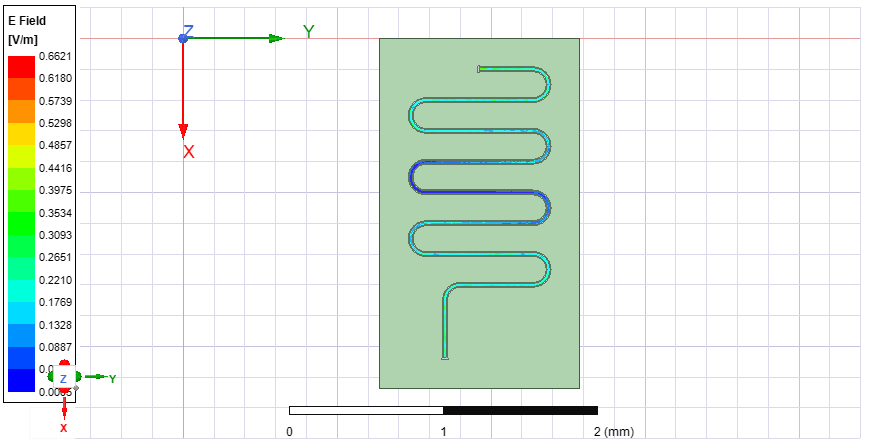

'C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/ansys_renders/cpw5_e-field.png'

In [45]:
hfss1.save_screenshot("C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/ansys_renders/cpw5_e-field.png")

#### Readout (OL1)

In [46]:
from qiskit_metal.analyses.quantization import EPRanalysis
eig_res6 = EPRanalysis(design, "hfss")
hfss6 = eig_res6.sim.renderer
hfss6.start()

INFO 12:57AM [connect_project]: Connecting to Ansys Desktop API...
INFO 12:57AM [load_ansys_project]: 	Opened Ansys App
INFO 12:57AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 12:57AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/Nilay/Documents/Ansoft/
	Project:   Project3
INFO 12:57AM [__del__]: Disconnected from Ansys HFSS
INFO 12:57AM [__del__]: Disconnected from Ansys HFSS
INFO 12:57AM [connect_design]: 	Opened active design
	Design:    Tune_CPW5 [Solution type: Eigenmode]
INFO 12:57AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:57AM [connect]: 	Connected to project "Project3" and design "Tune_CPW5" 😀 



True

In [ ]:
readout_lines[0].options.total_length = '8522.72 um'
gui.rebuild()

hfss6.activate_ansys_design("Tune_ol1", 'eigenmode')
hfss6.render_design(['ol1'], [('ol1', 'start'), ('ol1', 'end')])

In [ ]:
hfss6.save_screenshot("C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/ansys_renders/ol1.png")

In [ ]:
# Analysis properties
setup6 = hfss6.pinfo.setup
setup6.passes = 10
setup6.n_modes = 1
print(f"""
Number of eigenmodes to find             = {setup6.n_modes}
Number of simulation passes              = {setup6.passes}
Convergence freq max delta percent diff  = {setup6.delta_f}
""")

# Next 2 lines are counterinuitive, since there is no junction in this resonator.
# However, these are necessary to make pyEPR work correctly. Please do note delete
hfss6.pinfo.design.set_variable('Lj', '12 nH')
hfss6.pinfo.design.set_variable('Cj', '1 fF')

setup6.analyze()

In [ ]:
eig_res6.sim.convergence_t, eig_res6.sim.convergence_f, _ = hfss6.get_convergences()
eig_res6.sim.plot_convergences()

In [ ]:
hfss1.save_screenshot("C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/ansys_renders/ol1_e-field.png")

#### Readout (OL2)

In [ ]:
from qiskit_metal.analyses.quantization import EPRanalysis
eig_res7 = EPRanalysis(design, "hfss")
hfss7 = eig_res7.sim.renderer
hfss7.start()

In [ ]:
readout_lines[1].options.total_length = '8426.96 um'
gui.rebuild()

hfss7.activate_ansys_design("Tune_ol2", 'eigenmode')
hfss7.render_design(['ol2'], [('ol2', 'start'), ('ol2', 'end')])

In [ ]:
hfss7.save_screenshot("C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/ansys_renders/ol2.png")

In [ ]:
# Analysis properties
setup7 = hfss7.pinfo.setup
setup7.passes = 10
setup7.n_modes = 1
print(f"""
Number of eigenmodes to find             = {setup7.n_modes}
Number of simulation passes              = {setup7.passes}
Convergence freq max delta percent diff  = {setup7.delta_f}
""")

# Next 2 lines are counterinuitive, since there is no junction in this resonator.
# However, these are necessary to make pyEPR work correctly. Please do note delete
hfss7.pinfo.design.set_variable('Lj', '12 nH')
hfss7.pinfo.design.set_variable('Cj', '1 fF')

setup7.analyze()

In [ ]:
eig_res7.sim.convergence_t, eig_res7.sim.convergence_f, _ = hfss7.get_convergences()
eig_res7.sim.plot_convergences()

In [ ]:
hfss1.save_screenshot("C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/ansys_renders/ol2_e-field.png")

#### Readout (OL3)

In [ ]:
from qiskit_metal.analyses.quantization import EPRanalysis
eig_res8 = EPRanalysis(design, "hfss")
hfss8 = eig_res8.sim.renderer
hfss8.start()

In [ ]:
readout_lines[2].options.total_length = '8333.33 um'
gui.rebuild()

hfss8.activate_ansys_design("Tune_ol3", 'eigenmode')
hfss8.render_design(['ol3'], [('ol3', 'start'), ('ol3', 'end')])

In [ ]:
hfss8.save_screenshot("C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/ansys_renders/ol3.png")

In [ ]:
# Analysis properties
setup8 = hfss8.pinfo.setup
setup8.passes = 10
setup8.n_modes = 1
print(f"""
Number of eigenmodes to find             = {setup8.n_modes}
Number of simulation passes              = {setup8.passes}
Convergence freq max delta percent diff  = {setup8.delta_f}
""")

# Next 2 lines are counterinuitive, since there is no junction in this resonator.
# However, these are necessary to make pyEPR work correctly. Please do note delete
hfss8.pinfo.design.set_variable('Lj', '12 nH')
hfss8.pinfo.design.set_variable('Cj', '1 fF')

setup8.analyze()

In [ ]:
eig_res8.sim.convergence_t, eig_res8.sim.convergence_f, _ = hfss8.get_convergences()
eig_res8.sim.plot_convergences()

In [ ]:
hfss1.save_screenshot("C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/ansys_renders/ol3_e-field.png")

#### Readout (OL4)

In [ ]:
from qiskit_metal.analyses.quantization import EPRanalysis
eig_res9 = EPRanalysis(design, "hfss")
hfss9 = eig_res9.sim.renderer
hfss9.start()

In [ ]:
readout_lines[3].options.total_length = '8241.75 um'
gui.rebuild()

hfss9.activate_ansys_design("Tune_ol4", 'eigenmode')
hfss9.render_design(['ol4'], [('ol4', 'start'), ('ol4', 'end')])

In [ ]:
hfss9.save_screenshot("C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/ansys_renders/ol4.png")

In [ ]:
# Analysis properties
setup9 = hfss9.pinfo.setup
setup9.passes = 10
setup9.n_modes = 1
print(f"""
Number of eigenmodes to find             = {setup9.n_modes}
Number of simulation passes              = {setup9.passes}
Convergence freq max delta percent diff  = {setup9.delta_f}
""")

# Next 2 lines are counterinuitive, since there is no junction in this resonator.
# However, these are necessary to make pyEPR work correctly. Please do note delete
hfss9.pinfo.design.set_variable('Lj', '12 nH')
hfss9.pinfo.design.set_variable('Cj', '1 fF')

setup9.analyze()

In [ ]:
eig_res9.sim.convergence_t, eig_res9.sim.convergence_f, _ = hfss9.get_convergences()
eig_res9.sim.plot_convergences()

In [ ]:
hfss1.save_screenshot("C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/ansys_renders/ol4_e-field.png")